# Titanic

O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando passageiros e tripulantes. Esta tragédia chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tal perda de vida foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

## Perguntas a Serem Respondidas

* Mulheres são mais propensas a sobreviver?
* A classe em que o passageiro encontrava-se foi um fator decisivo para sobrevivência?
* Crianças pequenas são mais propensas a sobreviver?
* Se VOCÊ estivesse lá, teria sobrevivido? 

## Apresentando os Dados

* PassengerId = id do passageiro
* survival = sobreviveu = 0 - não, 1 - sim
* pclass = Classe = 1 = primeiro, 2 = segundo, 3 = terceiro
* Nome
* sex
* Age = idade em anos
* sibsp = Número de irmãos / cônjuges a bordo do Titanic 
* parch = Número de pais / filhos a bordo do Titanic
* ticket = número do bilhete
* fare = tarifa
* cabin = número da cabine
* embarked = Porto de embarcação = C = Cherbourg, Q = Queenstown, S = Southampton

In [181]:
#bibliotecas de análise de dados
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

In [182]:
#leitura dos dados
df = pd.read_csv("data_titanic.csv")

In [183]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
df.shape

(891, 12)

## Análise e tratamento dos Dados

In [185]:
df = df.drop(['PassengerId','Cabin','Ticket', 'Name'], axis=1)

In [186]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [187]:
df.columns = ['Sobreviveu', 'Classe', 'Sexo', 'Idade', 'Irmaos/Conjuge', 'Pais/Criancas', 'Tarifa', 'Embarque']

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Sobreviveu        891 non-null int64
Classe            891 non-null int64
Sexo              891 non-null object
Idade             714 non-null float64
Irmaos/Conjuge    891 non-null int64
Pais/Criancas     891 non-null int64
Tarifa            891 non-null float64
Embarque          889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [189]:
df.head()

,Sobreviveu,Classe,Sexo,Idade,Irmaos/Conjuge,Pais/Criancas,Tarifa,Embarque
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Variáveis (features) Numéricas Contínuas:
* Idade
* Tarifa

#### Variáveis (features) Numéricas Discretas:
* Irmaos/Conjuge
* Pais/Criancas

#### Variáveis (features) Categóricas:
* Sobreviveu
* Sexo
* Embarque

In [190]:
df.describe(include='all')

,Sobreviveu,Classe,Sexo,Idade,Irmaos/Conjuge,Pais/Criancas,Tarifa,Embarque
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [191]:
df.isnull().sum()

Sobreviveu          0
Classe              0
Sexo                0
Idade             177
Irmaos/Conjuge      0
Pais/Criancas       0
Tarifa              0
Embarque            2
dtype: int64

In [192]:
# Algumas observações: 891 passageiros, faltantes idade e embarque.

### Valores Faltantes - Tratando a feature Idade

In [193]:
df["Idade"].isnull().sum()

177

In [194]:
media_idade   = df["Idade"].mean()
std_idade     = df["Idade"].std()
contador_nan  = df["Idade"].isnull().sum()

In [195]:
rand = np.random.randint(media_idade - std_idade, media_idade + std_idade, size = contador_nan)

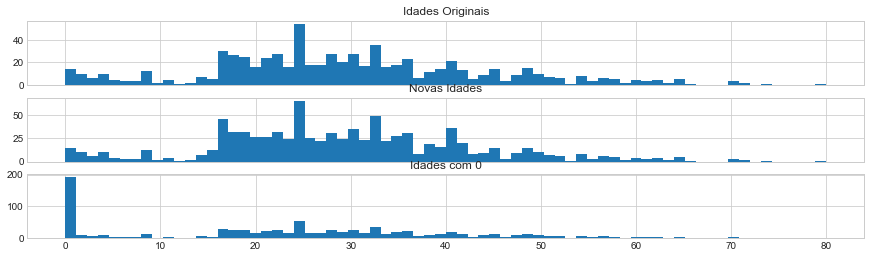

In [196]:
fig, (axis1,axis2, axis3) = plt.subplots(3,sharex=True,figsize=(15,4))
axis1.set_title('Idades Originais')
axis2.set_title('Novas Idades')
axis3.set_title('Idades com 0')
df['Idade'].dropna().astype(int).hist(bins=70, ax=axis1)
df['Idade'].fillna(0).hist(bins=70, ax=axis3)
df['Idade'][np.isnan(df['Idade'])] = rand
df['Idade'] = df['Idade'].astype(int)
df['Idade'].hist(bins=70, ax=axis2)

### Valores Faltantes - Tratando a feature Embarque

In [197]:
df["Embarque"].isnull().sum()

2

In [198]:
df["Embarque"].value_counts() 

S    644
C    168
Q     77
Name: Embarque, dtype: int64

In [199]:
df["Embarque"] = df["Embarque"].fillna("S")

### Sexo 

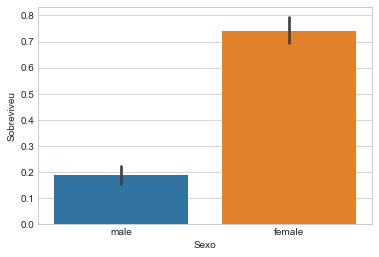

In [200]:
#Ploto um gráfico de barras dos sobreviventos por sexo
sns.barplot(x="Sexo", y="Sobreviveu", data=df)

In [201]:
#Pergunta 3 - Qual % de homens e mulheres sobreviveram à tragédia?
print("Percentual de mulheres que sobreviveram:", df["Sobreviveu"][df["Sexo"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentual de homens que sobreviveram:", df["Sobreviveu"][df["Sexo"] == 'male'].value_counts(normalize = True)[1]*100)

Percentual de mulheres que sobreviveram: 74.2038216561
Percentual de homens que sobreviveram: 18.8908145581


### Classe

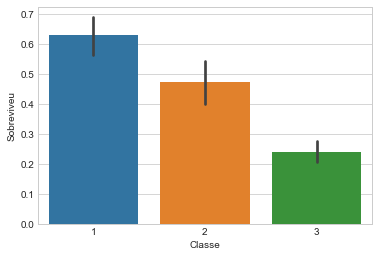

In [202]:
#Ploto um gráfico de barras dos sobreviventes por classe
sns.barplot(x="Classe", y="Sobreviveu", data=df)

In [203]:
# Pergunta 2 - A classe em que o passageiro encontrava-se foi um fator decisivo para sobrevivência?
print("Percentual da Classe = 1 que sobreviveu:", df["Sobreviveu"][df["Classe"] == 1].value_counts(normalize = True)[1]*100)

print("Percentual da Classe = 2 que sobreviveu:", df["Sobreviveu"][df["Classe"] == 2].value_counts(normalize = True)[1]*100)

print("Percentual da Classe = 3 que sobreviveu:", df["Sobreviveu"][df["Classe"] == 3].value_counts(normalize = True)[1]*100)

Percentual da Classe = 1 que sobreviveu: 62.962962963
Percentual da Classe = 2 que sobreviveu: 47.2826086957
Percentual da Classe = 3 que sobreviveu: 24.2362525458


In [204]:
# Pessoas com maior nível sócioeconômico apresentam maior taxa de sobrevicência.

### Idade

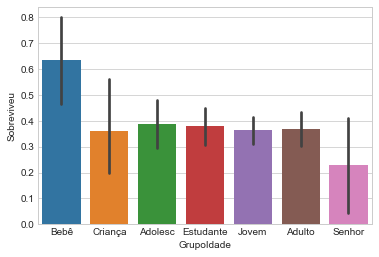

In [205]:
bins = [1, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Bebê', 'Criança', 'Adolesc', 'Estudante', 'Jovem', 'Adulto', 'Senhor']
df['GrupoIdade'] = pd.cut(df["Idade"], bins, labels = labels)

#Ploto um gráfico de barras de idade por sobrevivente
sns.barplot(x="GrupoIdade", y="Sobreviveu", data=df)
plt.show()

In [206]:
df = pd.get_dummies(df, columns = ['Sexo', 'Embarque'])

In [207]:
df.head()

,Sobreviveu,Classe,Idade,Irmaos/Conjuge,Pais/Criancas,Tarifa,GrupoIdade,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
0,0,3,22,1,0,7.2500,Estudante,0,1,0,0,1
1,1,1,38,1,0,71.2833,Adulto,1,0,1,0,0
2,1,3,26,0,0,7.9250,Jovem,1,0,0,0,1
3,1,1,35,1,0,53.1000,Jovem,1,0,0,0,1
4,0,3,35,0,0,8.0500,Jovem,0,1,0,0,1


### Tarifa

In [208]:
df['Tarifa'] = df['Tarifa'].astype(int)

In [209]:
df.head()

,Sobreviveu,Classe,Idade,Irmaos/Conjuge,Pais/Criancas,Tarifa,GrupoIdade,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
0,0,3,22,1,0,7,Estudante,0,1,0,0,1
1,1,1,38,1,0,71,Adulto,1,0,1,0,0
2,1,3,26,0,0,7,Jovem,1,0,0,0,1
3,1,1,35,1,0,53,Jovem,1,0,0,0,1
4,0,3,35,0,0,8,Jovem,0,1,0,0,1


## Modelos

### Divisão dos dados de treinamento e teste

In [217]:
from sklearn.model_selection import train_test_split

X = df.drop(['Sobreviveu', 'GrupoIdade'], axis=1)
y = df['Sobreviveu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Gaussian Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

79.66


### Regressão Logística

In [221]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

81.36


### Support Vector Machines

In [222]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

66.78


### Linear SVC

In [224]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

80.68


### Perceptron

In [225]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

59.32


### Decision Tree

In [226]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

78.64


### Random Forest

In [227]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

80.0


### KNN 

In [228]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

70.17


### Gradient Boosting Classifier

In [229]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

80.68


In [230]:
models = pd.DataFrame({
    'Modelo': ['Gaussian Naive Bayes', 'Regressão Logística', 'Support Vector Machines', 'Linear SVC', 
              'Perceptron', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting Classifier'],
    'Score': [acc_gaussian, acc_logreg, acc_svc, acc_linear_svc, acc_perceptron, acc_decisiontree, acc_randomforest, acc_knn, 
              acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Modelo,Score
1,Regressão Logística,81.36
3,Linear SVC,80.68
8,Gradient Boosting Classifier,80.68
6,Random Forest,80.00
0,Gaussian Naive Bayes,79.66
5,Decision Tree,78.64
7,KNN,70.17
2,Support Vector Machines,66.78
4,Perceptron,59.32


## Se VOCÊ estivesse lá, teria sobrevivido? 

In [259]:
X_test = X_test[ :1]
X_test

,Classe,Idade,Irmaos/Conjuge,Pais/Criancas,Tarifa,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S
709,3,22,1,1,15,0,1,1,0,0


In [260]:
X = [[3,22,1,1,15,0,1,1,0,0]]

In [261]:
X

[[3, 22, 1, 1, 15, 0, 1, 1, 0, 0]]

In [262]:
sobrev = logreg.predict(xVOCE)
sobrev

array([0], dtype=int64)